In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

# Очистка, выявление nan и анализ столбцов оп типам

## Первичный анализ

In [3]:
raw_data = pd.read_csv('data/train.csv')

In [4]:
raw_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
raw_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
raw_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
is_na = raw_data.isna().sum(axis=0)
is_na[is_na !=0]

Age         177
Cabin       687
Embarked      2
dtype: int64

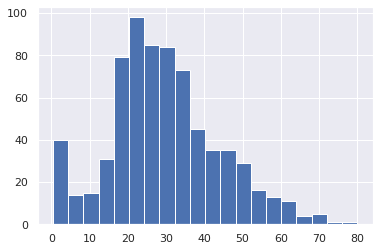

In [8]:
age_clear = raw_data['Age'].dropna()
plt.hist(age_clear, bins=20);

Анализ столбцов:
* Name - можно откинуть, так как слишком много уникальных значений
* Ticket - откидываем, так как слишком много уникальных значений
* Cabin - откидываем, так как много na, слишком много уникальных значений
* PassengerID- откидывам; не несет полезной информации
* Sex - преобразуем с помощью one hot encodeing
* Embarked - откинем nan из-за их небольшого количества и преобразуем в one hot encodnig
* Age - Похоже на то что имеет стандартное распределение, поэтому будем заменять отсутствующие значения при помощи алгоритмов машинного обучения

## Очистка

### Отбрасываю ненужные столбцы и обрабатываю категориальные данные

In [9]:
df_cleaned = raw_data.drop(labels=['Ticket', 'Cabin', 'Name', 'PassengerId'], axis=1)
df_cleaned.dropna(inplace=True, subset=['Embarked'])
df_cleaned = pd.get_dummies(df_cleaned, columns=['Embarked'])
df_cleaned['Sex'].replace(to_replace=['male', 'female'], value=[1, 0], inplace=True)
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


### Заменяю nan в Age при помощи KNN

In [10]:
from sklearn.impute import KNNImputer

In [11]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
X = df_cleaned.drop(labels=['Survived'], axis=1)
X_transformed = imputer.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed, columns=X.columns)

Text(0.5, 1.0, 'nans replaced by knn')

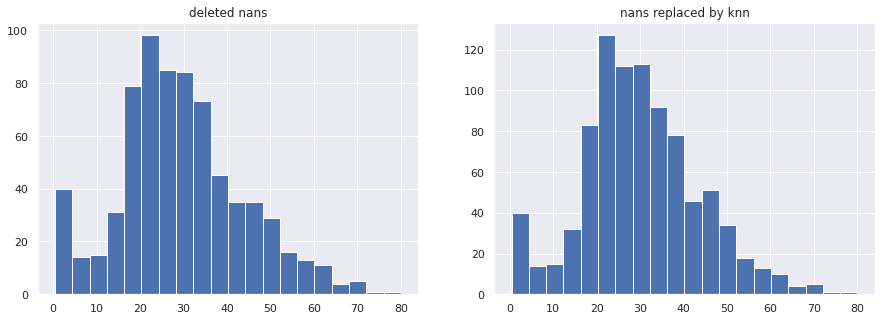

In [12]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
bins = 20
axis[0].hist(age_clear, bins=bins)
axis[0].set_title('deleted nans')


axis[1].hist(X_transformed['Age'], bins=bins)
axis[1].set_title('nans replaced by knn')

Как мы видим, распределение данных не поменялось, поэтому остановимся на этом варианте

In [13]:
df_cleaned['Age'] = X_transformed['Age']

In [14]:
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,26.8,0,0,13.0000,0,0,1
887,1,1,0,26.0,0,0,30.0000,0,0,1
888,0,3,0,32.0,1,2,23.4500,0,0,1
889,1,1,1,NaN,0,0,30.0000,1,0,0


# Выдвижение и проверка гипотез

## Гипотезы


* Age влияет на выживаемость и тут нет линейной кореляции
* Fare имеет положительную корелляцию с выживаемостью
* Pclass имеет отрицательную корелляцию с выживаемостью
* Fare и Pclass - взаимозаменяемые параметры модели
* SibSp и Parch можно комбинировать в один параметер(Relatives) и этот параметер будет иметь пололжительную корелляцию с выживаемостью
* Embarked имеет связь с Pclass и Fare и соотвественно связан с Survived, так как города могут отличаться по средней состоятельности граждан
* Sex=0(женщины) имеют больше шансов выжить чем мужчины
* Большое значение "Relatives" - положительно влияют на мужчин и не влияет на женщин
* В зависимости от пола может менять корреляция Pclass и Survived

## Проверка гипотез

### Age влияет на выживаемость и тут нет линейной кореляции

Сначала проверим на данных полученных при помощи knn

<AxesSubplot:xlabel='Age', ylabel='Count'>

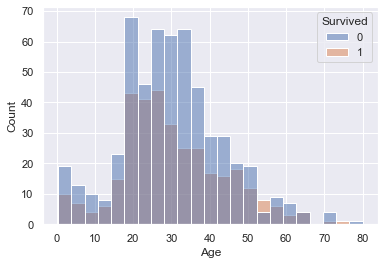

In [14]:
sns.histplot(df_cleaned, x='Age', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Density'>

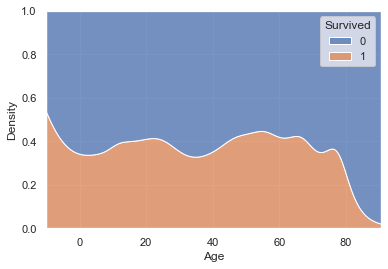

In [15]:
sns.kdeplot(
    data=df_cleaned,
    x='Age', hue='Survived',
    multiple="fill")

Возраст в одиночку практически не влияет на выживаемость

(array([0.00611916, 0.00437083, 0.02709913, 0.03890037, 0.02622497,
        0.01180124, 0.01442373, 0.00437083, 0.0026225 , 0.00043708]),
 array([ 0.67 ,  8.003, 15.336, 22.669, 30.002, 37.335, 44.668, 52.001,
        59.334, 66.667, 74.   ]),
 <BarContainer object of 10 artists>)

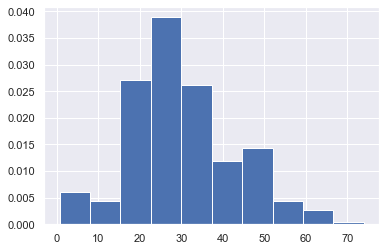

In [16]:
plt.hist(df_cleaned[df_cleaned['Sex'] == 0]['Age'], density=True)

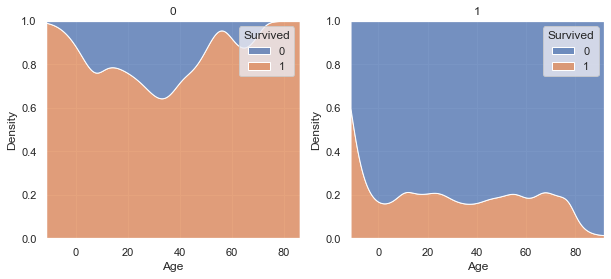

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for i in range(2):
    sns.kdeplot(data=df_cleaned[df_cleaned['Sex'] == i], x='Age', hue='Survived', ax=axes[i] ,multiple="fill")
    axes[i].set_title(i)

# axes[0].hist(df_cleaned[df_cleaned['Sex'] == 0]['Age'], density=True)
# sns.kdeplot(data=df_cleaned[df_cleaned['Sex'] == 0], x='Age', ax=axes[0])

<AxesSubplot:xlabel='Age', ylabel='Count'>

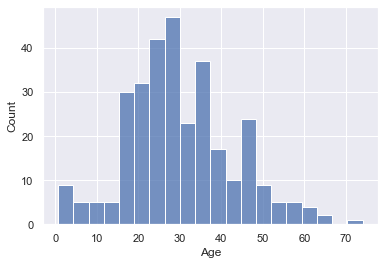

In [18]:
sns.histplot(df_cleaned[df_cleaned['Sex'] == 0], x='Age', bins=20)

In [19]:
# TODO: Создать график распределения и вероятности

Выводы:
* Возраст не имеет линейной корелляции с выживаемостью
* Для мужчин зависимость выживаемости от возраста не видна
* Для женщин возраст влияет на выживаемость, но это может быть вызвано небольшим количеством данных
* Для линейной регрессии лучше выкинуть возраст



### Fare имеет положительную корелляцию с выживаемостью

<AxesSubplot:xlabel='Fare', ylabel='Density'>

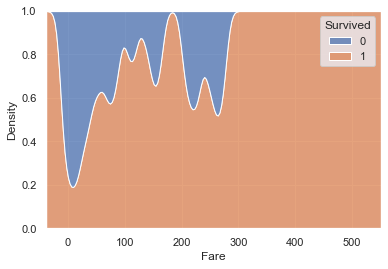

In [20]:
sns.kdeplot(data=df_cleaned, x='Fare', hue='Survived' ,multiple="fill")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

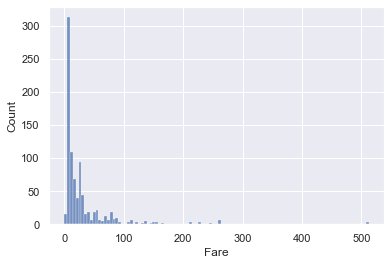

In [21]:
sns.histplot(data=df_cleaned, x='Fare', )

Распределение с очень длинным хвостом

In [22]:
df_cleaned['Fare'].quantile([0.25, 0.5, 0.75, 0.85, 0.95])

0.25      7.89580
0.50     14.45420
0.75     31.00000
0.85     56.37664
0.95    112.31832
Name: Fare, dtype: float64

In [23]:
df_cleaned[df_cleaned['Pclass'] == 1]['Fare'].quantile([0.25, 0.5, 0.75, 0.85, 0.95])

0.25     30.77185
0.50     58.68960
0.75     93.50000
0.85    135.63330
0.95    234.52353
Name: Fare, dtype: float64

In [24]:
quantile_95 = np.quantile(df_cleaned['Fare'], 0.95)
less_95 = df_cleaned[df_cleaned['Fare'] < quantile_95]
more_95 = df_cleaned[df_cleaned['Fare'] > quantile_95]

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

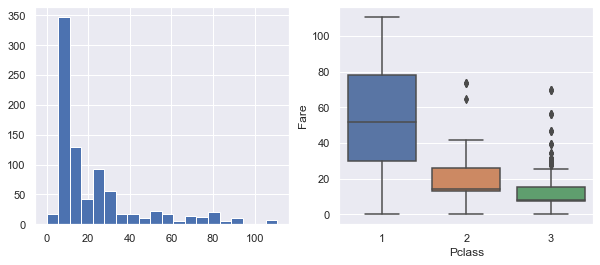

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(less_95['Fare'], bins=20);
sns.boxplot(data=less_95, x='Pclass', y='Fare')

<AxesSubplot:xlabel='Fare', ylabel='Density'>

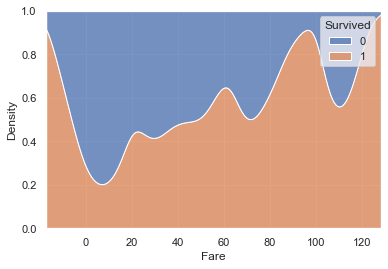

In [26]:
sns.kdeplot(data=less_95, x='Fare', hue='Survived' ,multiple="fill")

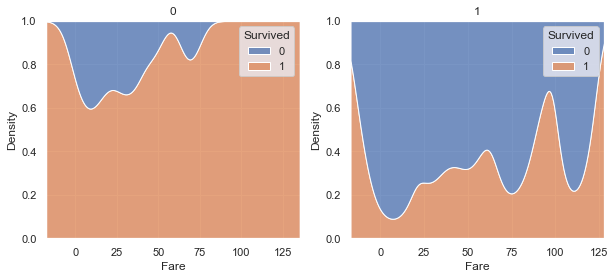

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
for i in range(2):
    sns.kdeplot(data=less_95[less_95['Sex']==i], x='Fare', hue='Survived' ,multiple="fill", ax=axes[i])
    axes[i].set_title(i)

(array([20.,  5.,  9.,  8.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([113.275  , 153.18042, 193.08584, 232.99126, 272.89668, 312.8021 ,
        352.70752, 392.61294, 432.51836, 472.42378, 512.3292 ]),
 <BarContainer object of 10 artists>)

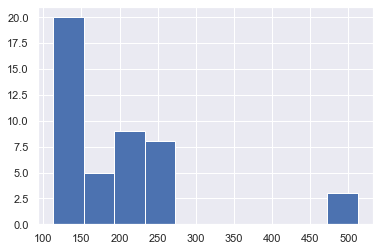

In [28]:
plt.hist(more_95['Fare'])

Выводы:
* Имеет длинный хвост
* 95% данных находятся в промежутке от 0 до 100. 5% неравномерно распределены между 100 и 500
* Есть линейная зависимость между Fare и выживаемостью, причем она видна как для мужчин, так и для женщин

Итог: Данный параметер надо оставить для тренирования модели, но стоит избавиться от выброса(значения>300)

### Pclass имеет отрицательную корелляцию с выживаемостью

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

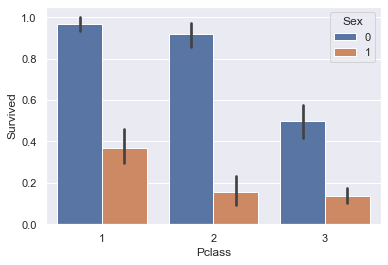

In [29]:
sns.barplot(data=df_cleaned, x='Pclass', y='Survived', hue='Sex')

Вывод: как для мужчин, так и для женщин класс влияет на выживаемость, что логично

### SibSp и Parch можно комбинировать в один параметер(сумму) и этот параметер будет иметь пололжительную корелляцию с выживаемостью

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

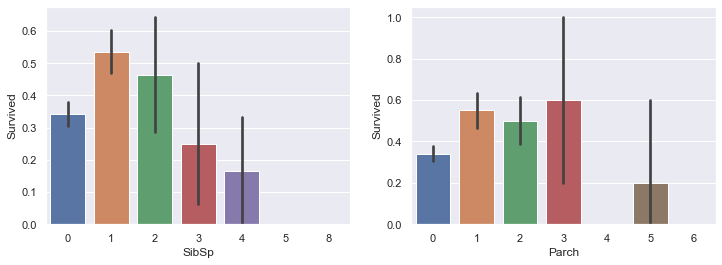

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(data=df_cleaned, x='SibSp', y='Survived', ax=axes[0])
sns.barplot(data=df_cleaned, x='Parch', y='Survived', ax=axes[1])

In [31]:
df_vis = df_cleaned.copy()
df_vis['Relatives'] = df_vis['SibSp'] + df_vis['Parch']

<AxesSubplot:xlabel='Relatives', ylabel='Survived'>

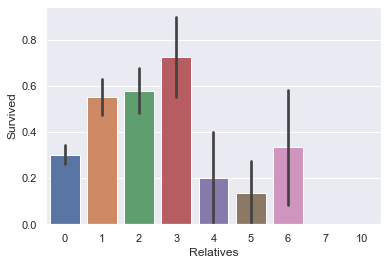

In [32]:
sns.barplot(data=df_vis, x='Relatives', y='Survived')

Выводы:
* Сумма SibSp и Parch - это параметер, имеющий положительную коррелляцию

### Embarked имеет связь с Pclass и Fare и соотвественно связан с Survived, так как города могут отличаться по средней состоятельности граждан

In [33]:
df_vis = df_cleaned.copy()
df_vis.drop(labels=['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
df_vis['Embarked'] = raw_data['Embarked']

<AxesSubplot:xlabel='Embarked', ylabel='count'>

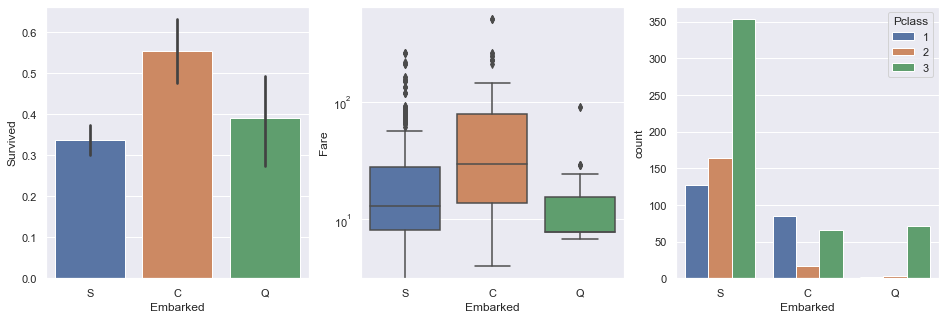

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.barplot(data=df_vis, x='Embarked', y='Survived', ax=axes[0])
sns.boxplot(data=df_vis, x='Embarked', y='Fare', ax=axes[1])
axes[1].set_yscale("log")
sns.countplot(data=df_vis, hue='Pclass', x='Embarked', ax=axes[2])

Выводы:
* Embarked зависит от Fare и Pclass, поэтому корреляция между Embrked и Survived вызвана не самим этим параметром, а его связью с двумя другими, которые уже в свою очередь определеяют выживаемость, поэтому от данного параметра можно избавиться

### Sex=0(женщины) имеют больше шансов выжить чем мужчины

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

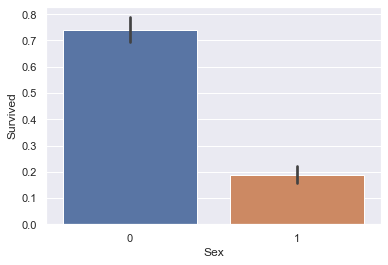

In [35]:
sns.barplot(data=df_cleaned, x='Sex', y='Survived')

### Большое значение "Relatives" - положительно влияют на мужчин и не влияет на женщин

In [36]:
df_vis = df_cleaned.copy()
df_vis['Relatives'] = df_vis['SibSp'] + df_vis['Parch']

<AxesSubplot:xlabel='Relatives', ylabel='Survived'>

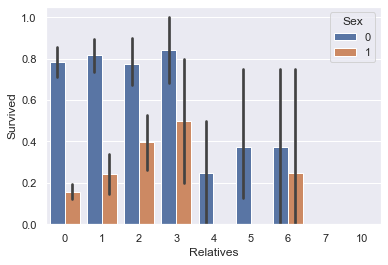

In [37]:
sns.barplot(data=df_vis, x='Relatives', y='Survived', hue='Sex')

<AxesSubplot:xlabel='Relatives', ylabel='count'>

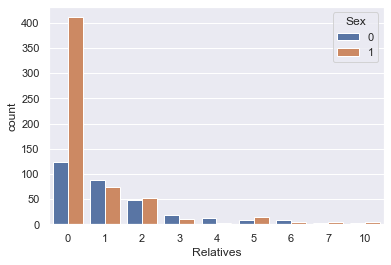

In [38]:
sns.countplot(data=df_vis, x='Relatives', hue='Sex')

<AxesSubplot:xlabel='Sex', ylabel='count'>

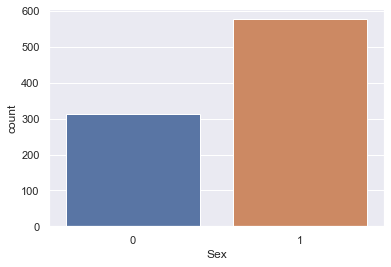

In [39]:
sns.countplot(data=df_cleaned, x='Sex')

Вывод:
* Гипотеза верна
* Возможно имеет смысл сделать два классификатора(1 - для женщин, 2 - для мужчин) из-за различий, которые возникают с relatives

### В зависимости от пола может менять корреляция Pclass и Survived

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

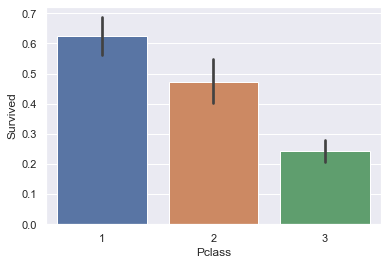

In [40]:
sns.barplot(data=df_cleaned, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

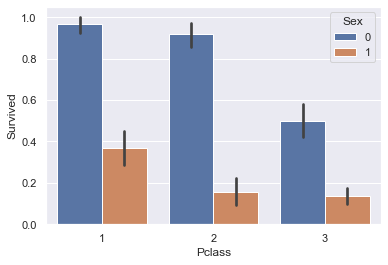

In [41]:
sns.barplot(data=df_cleaned, x='Pclass', y='Survived', hue='Sex')

Выводы:
* Для мужчин заметный скачек наблюдается только для превого класса
* Для женщин скачек начинается с второго класса

Итог для модели:
* Ecли мы будем тренировать два модели(для женщин и мужчин), то для Pclass надо сделать one_hot_encoding
* Иначе, one_hot_encoding делать не надо

In [42]:
del df_vis

# Создание моделей

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

## Две отдельные линейные регрессии для мужчин и женщин соответственно

### Подготовка данных

In [338]:
df_model = df_cleaned.copy()
df_model['Relatives'] = df_model['Parch'] + df_model['SibSp']
df_model.drop(labels=['Embarked_S', 'Embarked_Q', 'Embarked_C', 'SibSp', 'Age'], axis=1, inplace=True)
df_model = df_model[df_model['Fare']<400]

1. Разделить данные на тестовы и тренировочные
2. Разделить тестовые на мужский и женские тоже самое сделать с тренировачными

In [339]:
def reset_index(dfs):
    for ind, df in enumerate(dfs):
        dfs[ind] = df.reset_index(drop=True)
    return dfs

In [340]:
def return_gender_df(df, gender):
    one_gender_df = df[df['Sex'] == gender]
    return one_gender_df.drop(labels=['Sex'], axis=1).reset_index(drop=True)

In [362]:
df_train, df_test =  reset_index(train_test_split(df_model, train_size=0.9))

gender = 0
female_train = return_gender_df(df_train, gender)
female_test = return_gender_df(df_test, gender)


gender = 1
male_train = return_gender_df(df_train, gender)
male_test = return_gender_df(df_test, gender)


### Параметры модели

In [363]:
logistic_regression_pipe = Pipeline([('estimator', LogisticRegression())])
logistic_parameters = [
    {
        'estimator__fit_intercept': [False, True],
        'estimator__C': [0.001, 0.01, 0.4, 1, 2, 4, 8 ,10, 100],
        'estimator__class_weight': ['balanced']
    }]
logistic_grid = GridSearchCV(logistic_regression_pipe, logistic_parameters, cv=10, scoring='f1_micro')

In [364]:
svc_pipe = Pipeline([('data_transformer', MinMaxScaler()),
                  ('estimator', SVC())])
svc_parameters = [{
    'estimator__C': [0.1, 1, 2, 4, 10, 20, 40],
    'estimator__gamma': [0.05, 0.1, 0.2, 0.5, 1, 10, 20, 40],
    'estimator__probability': [True],
    'estimator__class_weight': ['balanced']
}]
svc_grid = GridSearchCV(svc_pipe, svc_parameters, cv=10)

In [365]:
def confusion_matrix_and_f_score(X_test, y_test, estimator):
    pred = estimator.predict(X_test)
    real = y_test

    g = sns.heatmap(confusion_matrix(real, pred), annot=True, fmt="d")
    g.set_xlabel('Predicted')
    g.set_ylabel('Real')
    print('f-score:', f1_score(real, pred))

In [366]:
def return_X_y(df):
    return  df.drop(labels=['Survived'], axis=1),  df['Survived']

In [367]:
def mse(df, estimator):
    X, y = return_X_y(df)
    predicted = estimator.predict_proba(X)[:, 1]
    return  mean_squared_error(predicted, y)

### Тренировка модели для мужчин

In [368]:
male_train

,Survived,Pclass,Parch,Fare,Relatives
0,1,1,0,90.0000,1
1,0,3,0,7.2292,0
2,0,3,0,7.8958,0
3,0,2,0,10.5000,0
4,0,2,0,10.5000,0
...,...,...,...,...,...
512,0,3,0,7.9250,0
513,1,2,0,10.5000,0
514,0,1,0,26.5500,0
515,1,3,0,23.2500,2


In [369]:
def show_model_metrics(df_test, model):
    confusion_matrix_and_f_score(*return_X_y(df_test), model)
    accuracy = model.score(*return_X_y(df_test))
    print(f'accuracy: {accuracy}')
    print(f'MSE: {mse(df_test, model)}')

f-score: 0.689655172413793
accuracy: 0.8448275862068966
MSE: 0.19844822767978082


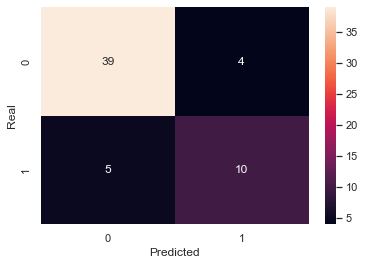

In [370]:
logistic_grid.fit(*return_X_y(male_train))
show_model_metrics(male_test, logistic_grid.best_estimator_)

f-score: 0.125
accuracy: 0.7586206896551724
MSE: 0.15947235587542258


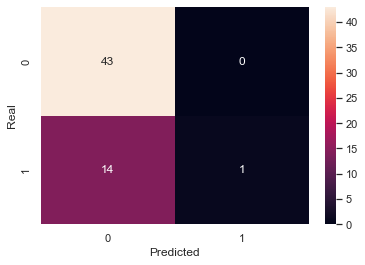

In [371]:
g = GaussianNB()
g.fit(*return_X_y(male_train))
show_model_metrics(male_test, g)

Мы можем заметить, что несмотря на улучшение в accuracy и MSE по сравнению с логической регрессией у нас крайне низкий F-score для наивного байеса

f-score: 0.6153846153846153
accuracy: 0.8275862068965517
MSE: 0.16874239748831443


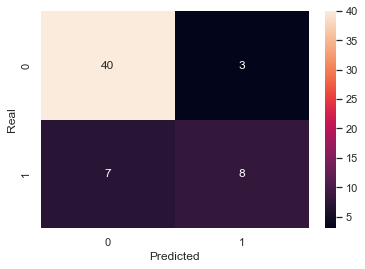

In [372]:
svc_grid.fit(*return_X_y(male_train))
show_model_metrics(male_test, svc_grid)

In [373]:
estimator_male = svc_grid.best_estimator_

### Тренировка модели для женщин

f-score: 0.7777777777777778
accuracy: 0.7419354838709677
MSE: 0.19242610308961278


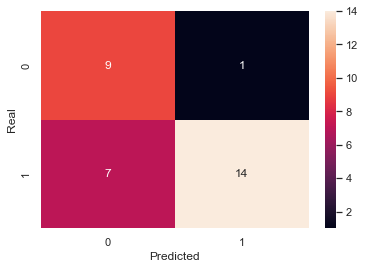

In [374]:
logistic_grid.fit(*return_X_y(female_train))
show_model_metrics(female_test, logistic_grid.best_estimator_)

f-score: 0.8421052631578947
accuracy: 0.8064516129032258
MSE: 0.1670717949131349


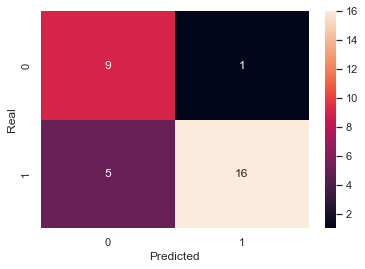

In [375]:
g = GaussianNB()
g.fit(*return_X_y(female_train))
show_model_metrics(female_test, g)

Гаусов наивный байес показывает отличные результаты, которые по всем параметрам превосходят логическую регрессию, поэтому мы остановимся на данной модели

f-score: 0.7500000000000001
accuracy: 0.6774193548387096
MSE: 0.2104214532298825


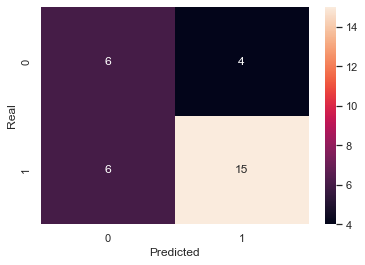

In [376]:
svc_grid.fit(*return_X_y(female_train))
show_model_metrics(female_test, svc_grid)

In [377]:
estimator_female = g

### Тренировка модели для предсказаний на основании 2-х предыдущих моделей и пола

In [378]:
from sklearn.base import BaseEstimator, TransformerMixin


class GenderProbaTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, estimator_male, estimator_female):
        self.estimator_male = estimator_male
        self.estimator_female = estimator_female

    def fit(self, X=None, y=None):
        return self

    def transform(self, X):
        # Вычисление вероятностей для женщин
        # copy чтобы подавить сообщение о SettingWithCopyWarning. Аналогично и для мужчин
        X_female = X[X['Sex'] == 0].copy()
        X_female.drop(labels=['Sex'], axis=1, inplace=True)
        predicted_female = self.estimator_female.predict_proba(X_female)[:, 1]
        # Вычисление вероятностей для мужчин
        X_male = X[X['Sex'] == 1].copy()
        X_male.drop(labels=['Sex'], axis=1, inplace=True)
        predicted_male = self.estimator_male.predict_proba(X_male)[:, 1]

        # Запись данных для главного классификатора в DataFrame
        samples = X.shape[0]
        X_transformed = pd.DataFrame(np.empty((samples,2),dtype='int'),columns=['survived_proba', 'Sex'])
        X_transformed['Sex'] = X['Sex']
        X_transformed.loc[X['Sex'] == 1, 'survived_proba'] = predicted_male
        X_transformed.loc[X['Sex'] == 0, 'survived_proba'] = predicted_female

        return X_transformed



In [379]:
transformer = GenderProbaTransformer(estimator_male, estimator_female)
X_temp, y_train = return_X_y(df_train)
X_train = transformer.fit_transform(X_temp)
logistic_grid.fit(X_train, y_train)
estimator_final = logistic_grid.best_estimator_

f-score: 0.6551724137931034
accuracy: 0.7752808988764045
MSE: 0.1615379408169883


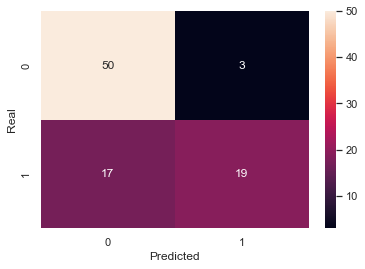

In [380]:
X_temp, y_test = return_X_y(df_test)
X_test = transformer.fit_transform(X_temp)
X_test['Survived'] = y_test
show_model_metrics(X_test, estimator_final)

In [381]:
from additional_modules.tools import  get_coefs_of_regression
get_coefs_of_regression(logistic_grid.best_estimator_['estimator'], X_test)

survived_proba    3.462020
Sex              -1.095649
intercept        -0.574849
dtype: float64

### Просто логическая регрессия для сравнения

f-score: 0.6571428571428571
accuracy: 0.7303370786516854
MSE: 0.18621242173950808


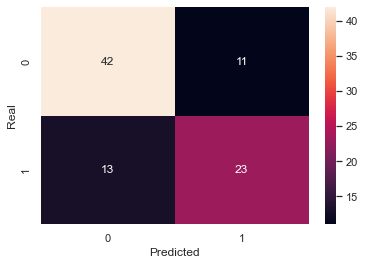

In [382]:
logistic_grid.fit(*return_X_y(df_train))
show_model_metrics(df_test, logistic_grid.best_estimator_)

# Подготовка csv для добавления на kaggle

In [434]:
kaggle_df = pd.read_csv('data/test.csv')
passenger_ids = kaggle_df['PassengerId']
kaggle_df['Relatives'] = kaggle_df['Parch'] + kaggle_df['SibSp']
kaggle_df['Sex'].replace(to_replace=['male', 'female'], value=[1, 0], inplace=True)
kaggle_df = kaggle_df.drop(labels=['Ticket', 'Cabin', 'Name', 'PassengerId', 'Embarked',  'SibSp', 'Age'], axis=1)

In [435]:
kaggle_df

,Pclass,Sex,Parch,Fare,Relatives
0,3,1,0,7.8292,0
1,3,0,0,7.0000,1
2,2,1,0,9.6875,0
3,3,1,0,8.6625,0
4,3,0,1,12.2875,2
...,...,...,...,...,...
413,3,1,0,8.0500,0
414,1,0,0,108.9000,0
415,3,1,0,7.2500,0
416,3,1,0,8.0500,0


In [436]:
kaggle_df.loc[kaggle_df['Fare'].isna(), ['Fare']] = kaggle_df.median()['Fare']

In [437]:
kaggle_df

,Pclass,Sex,Parch,Fare,Relatives
0,3,1,0,7.8292,0
1,3,0,0,7.0000,1
2,2,1,0,9.6875,0
3,3,1,0,8.6625,0
4,3,0,1,12.2875,2
...,...,...,...,...,...
413,3,1,0,8.0500,0
414,1,0,0,108.9000,0
415,3,1,0,7.2500,0
416,3,1,0,8.0500,0


In [438]:
transformed_df = transformer.fit_transform(kaggle_df)
predicted = estimator_final.predict(transformed_df)

In [451]:
predicted = np.zeros((418))

In [452]:
kaggle_submit_df = pd.DataFrame({'PassengerId': passenger_ids,
                                 'Survived': predicted})
kaggle_submit_df.to_csv(path_or_buf='data/kaggle_test_sub.csv', index=False)

In [453]:
kaggle_submit_df

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,0.0
415,1307,0.0
416,1308,0.0
